## Requirements

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import  mean_squared_error, r2_score
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels import graphics
from statsmodels.graphics.api import abline_plot

## Extra functions

In [2]:
def RMSE(ytrue, ypred):
    return np.sqrt(mean_squared_error(y_true = ytrue, y_pred = ypred))

## Importing dataset

In [3]:
df = pd.read_excel("mod.xlsx")

### Checking the dataset

In [4]:
df.head() 

,Nome do produtor,esp_cult,A_total (Hc),land_rent/hc(R$),N_viveiros,Area_lamina(m²),Area_lamina(hc),Tanque_berç,qtd_berç,densi_cult,...,main_income,compl_income,eletric_m(R$),diar,qtd_diar_ciclo,diar_pric(R$),numb_work,numb_famwork,salario,salário_fam
0,Arnon,Camarão,5.0,20000,5,10000,1.0000,1,2,150/m²,...,0,1,3000,1,3,60,2,0,1200,0
1,Cristina,Camarão,2.0,20000,5,10000,1.0000,0,0,90/m²,...,0,1,3500,1,1,50,2,0,1200,0
2,Clecio,Tilápia,0.5,20000,1,126,0.0126,0,0,7/m³,...,0,1,600,0,0,0,0,5,0,1000
3,Maurilio luiz martins,Tilápia,1.0,20000,1,90,0.0090,0,0,não fez o calculo,...,0,1,170,0,0,0,0,0,0,0
4,Eduardo Cordeiro da Silva,Tilápia,1.0,20000,6,7200,0.7200,1,1,6/m³,...,1,0,2200,1,2,70,2,0,1200,0


In [5]:
df.describe()

,A_total (Hc),land_rent/hc(R$),N_viveiros,Area_lamina(m²),Area_lamina(hc),Tanque_berç,qtd_berç,Prod_ano(Kg),ciclo_ano,aerador,...,main_income,compl_income,eletric_m(R$),diar,qtd_diar_ciclo,diar_pric(R$),numb_work,numb_famwork,salario,salário_fam
count,12.000000,13.0,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.0,...,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.0,13.000000,13.000000,13.000000
mean,4.583333,20000.0,5.461538,7146.384615,0.714638,0.384615,0.615385,38688.907692,2.492308,1.0,...,0.307692,0.692308,2397.692308,0.615385,1.538462,45.384615,1.0,1.538462,646.153846,307.692308
std,4.235099,0.0,3.755338,10589.778700,1.058978,0.506370,0.869718,59222.435212,0.579456,0.0,...,0.480384,0.480384,2329.750179,0.506370,1.560736,32.045641,1.0,2.401922,622.649426,487.273945
min,0.500000,20000.0,1.000000,90.000000,0.009000,0.000000,0.000000,850.000000,1.700000,1.0,...,0.000000,0.000000,170.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
25%,1.150000,20000.0,3.000000,980.000000,0.098000,0.000000,0.000000,3000.000000,2.000000,1.0,...,0.000000,0.000000,600.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
50%,3.500000,20000.0,5.000000,4300.000000,0.430000,0.000000,0.000000,11700.000000,3.000000,1.0,...,0.000000,1.000000,1300.000000,1.000000,1.000000,60.000000,1.0,0.000000,1200.000000,0.000000
75%,7.250000,20000.0,7.000000,9000.000000,0.900000,1.000000,1.000000,50001.000000,3.000000,1.0,...,1.000000,1.000000,3500.000000,1.000000,3.000000,70.000000,2.0,5.000000,1200.000000,800.000000
max,14.000000,20000.0,14.000000,40000.000000,4.000000,1.000000,2.000000,200000.000000,3.000000,1.0,...,1.000000,1.000000,7000.000000,1.000000,4.000000,70.000000,3.0,5.000000,1200.000000,1200.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 51 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Nome do produtor  13 non-null     object 
 1   esp_cult          13 non-null     object 
 2   A_total (Hc)      12 non-null     float64
 3   land_rent/hc(R$)  13 non-null     int64  
 4   N_viveiros        13 non-null     int64  
 5   Area_lamina(m²)   13 non-null     int64  
 6   Area_lamina(hc)   13 non-null     float64
 7   Tanque_berç       13 non-null     int64  
 8   qtd_berç          13 non-null     int64  
 9   densi_cult        13 non-null     object 
 10  Prod_ano(Kg)      13 non-null     float64
 11  ciclo_ano         13 non-null     float64
 12  aerador           13 non-null     int64  
 13  Controle_termico  13 non-null     int64  
 14  solo_treatpc      13 non-null     int64  
 15  probiotico        13 non-null     int64  
 16  qtd_prob_cicl     13 non-null     int64  
 17 

In [7]:
df.dtypes

Nome do produtor     object
esp_cult             object
A_total (Hc)        float64
land_rent/hc(R$)      int64
N_viveiros            int64
Area_lamina(m²)       int64
Area_lamina(hc)     float64
Tanque_berç           int64
qtd_berç              int64
densi_cult           object
Prod_ano(Kg)        float64
ciclo_ano           float64
aerador               int64
Controle_termico      int64
solo_treatpc          int64
probiotico            int64
qtd_prob_cicl         int64
Probiotico_água       int64
Probiotico_ração      int64
Probiótico_solo       int64
comer_resf            int64
comer_cong            int64
comer_natu            int64
peso_prod(g)          int64
water_source         object
qutd_mil_juv_an     float64
Kg/raç/ano          float64
Kg/raç/mês          float64
ton/raç/mês         float64
saca_rac_mes        float64
sac_rac_an          float64
preço_saco_ (R$)      int64
asist_tec             int64
n_tecn                int64
trein_trab            int64
yers_cult           

Nota-se que algumas variáveis ainda estão num formato de caracteres e outras com nomes que poderiam ser mudados para facilitar uma possível modelagem. Faremos um pré-processamento inicial para que a variável categórica se torne numérica, renomearemos algumas colunas e dividiremos o dataset em dois, um contendo os produtores de tilápia e outro com os produtores de camarão.

## Preprocessing

In [8]:
#Renaming columns
df.rename(columns={'Nome do produtor': 'produtor',
                   'A_total (Hc)':'A_tot',
                   
                   'preço_saco_ (R$)':'preco_sac',
                  'Prod_ano(Kg)':'prod_an',
                  'Area_lamina(hc)':'arealamhc'}, inplace=True)
#Checking if the names were changed
for col in df.columns:
    print(col)

produtor
esp_cult
A_tot
land_rent/hc(R$)
N_viveiros
Area_lamina(m²)
arealamhc
Tanque_berç
qtd_berç
densi_cult
prod_an
ciclo_ano
aerador
Controle_termico
solo_treatpc
probiotico
qtd_prob_cicl
Probiotico_água
Probiotico_ração
Probiótico_solo
comer_resf
comer_cong
comer_natu
peso_prod(g)
water_source
qutd_mil_juv_an
Kg/raç/ano
Kg/raç/mês
ton/raç/mês
saca_rac_mes
sac_rac_an
preco_sac
asist_tec
n_tecn
trein_trab
yers_cult
educ
prec_kil(R$)
prec_mijuv
prec_prob
consult_pri(R$)
main_income
compl_income
eletric_m(R$)
diar
qtd_diar_ciclo
diar_pric(R$)
numb_work
numb_famwork
salario
salário_fam


In [9]:
# Checking which are the values in the variable educ
df['educ'].value_counts(normalize=True)

ensino medio completo      0.307692
superior completo          0.230769
fundamental incompleto     0.230769
superior incompleto        0.153846
ensino medio incompleto    0.076923
Name: educ, dtype: float64

It's notable that there are 5 different vallues for this variable and its counting the education level of the producers, so let's codify this variable attributing numerical values for each of these values.

In [10]:
# Changing the values of the educational level of the producers for numerical values. 
# Higher values attributed to the producers with more years of formal education
df['educ'] = df['educ'].replace({'ensino medio completo':'2',
                                 'superior completo':'4',
                                 'fundamental incompleto':'0',
                                 'superior incompleto':'3',
                                 'ensino medio incompleto':'1'})
df['educ'] = df['educ'].astype(float)

In [11]:
df.dtypes

produtor             object
esp_cult             object
A_tot               float64
land_rent/hc(R$)      int64
N_viveiros            int64
Area_lamina(m²)       int64
arealamhc           float64
Tanque_berç           int64
qtd_berç              int64
densi_cult           object
prod_an             float64
ciclo_ano           float64
aerador               int64
Controle_termico      int64
solo_treatpc          int64
probiotico            int64
qtd_prob_cicl         int64
Probiotico_água       int64
Probiotico_ração      int64
Probiótico_solo       int64
comer_resf            int64
comer_cong            int64
comer_natu            int64
peso_prod(g)          int64
water_source         object
qutd_mil_juv_an     float64
Kg/raç/ano          float64
Kg/raç/mês          float64
ton/raç/mês         float64
saca_rac_mes        float64
sac_rac_an          float64
preco_sac             int64
asist_tec             int64
n_tecn                int64
trein_trab            int64
yers_cult           

## Creating economic variables


In [12]:
# Creating new economic variables to make deeper analysis based in the data we have 
df['productivity'] = df['prod_an']/df['arealamhc']
df['gross income']=df['prec_kil(R$)']*df['prod_an']
df['EOC'] = (df['qtd_diar_ciclo']*df['diar_pric(R$)']*df['ciclo_ano'])+(df['numb_work']*df['salario']*12)+(df['sac_rac_an']*df['preco_sac'])+(df['eletric_m(R$)']*12)
df['TOC'] = df['EOC']+(df['qutd_mil_juv_an']*df['prec_mijuv'])+(df['consult_pri(R$)']*12)+(df['numb_famwork']*df['salário_fam']*12)
df['LOC'] = df['land_rent/hc(R$)']*df['arealamhc']
df['TC'] = df['TOC']+df['LOC']
df['GM'] = df['gross income']-df['EOC']
df['NM'] = df['gross income']-df['TOC']
df['Profit'] = df['gross income']-df['TC']

In [13]:
# Creating a new df without the variables which presented common values from all producers to better visualization of correlations
df2 = df.drop(columns=['land_rent/hc(R$)', 'aerador', 'comer_natu'])

<AxesSubplot:title={'center':'Heatmap of the producers variables correlation'}>

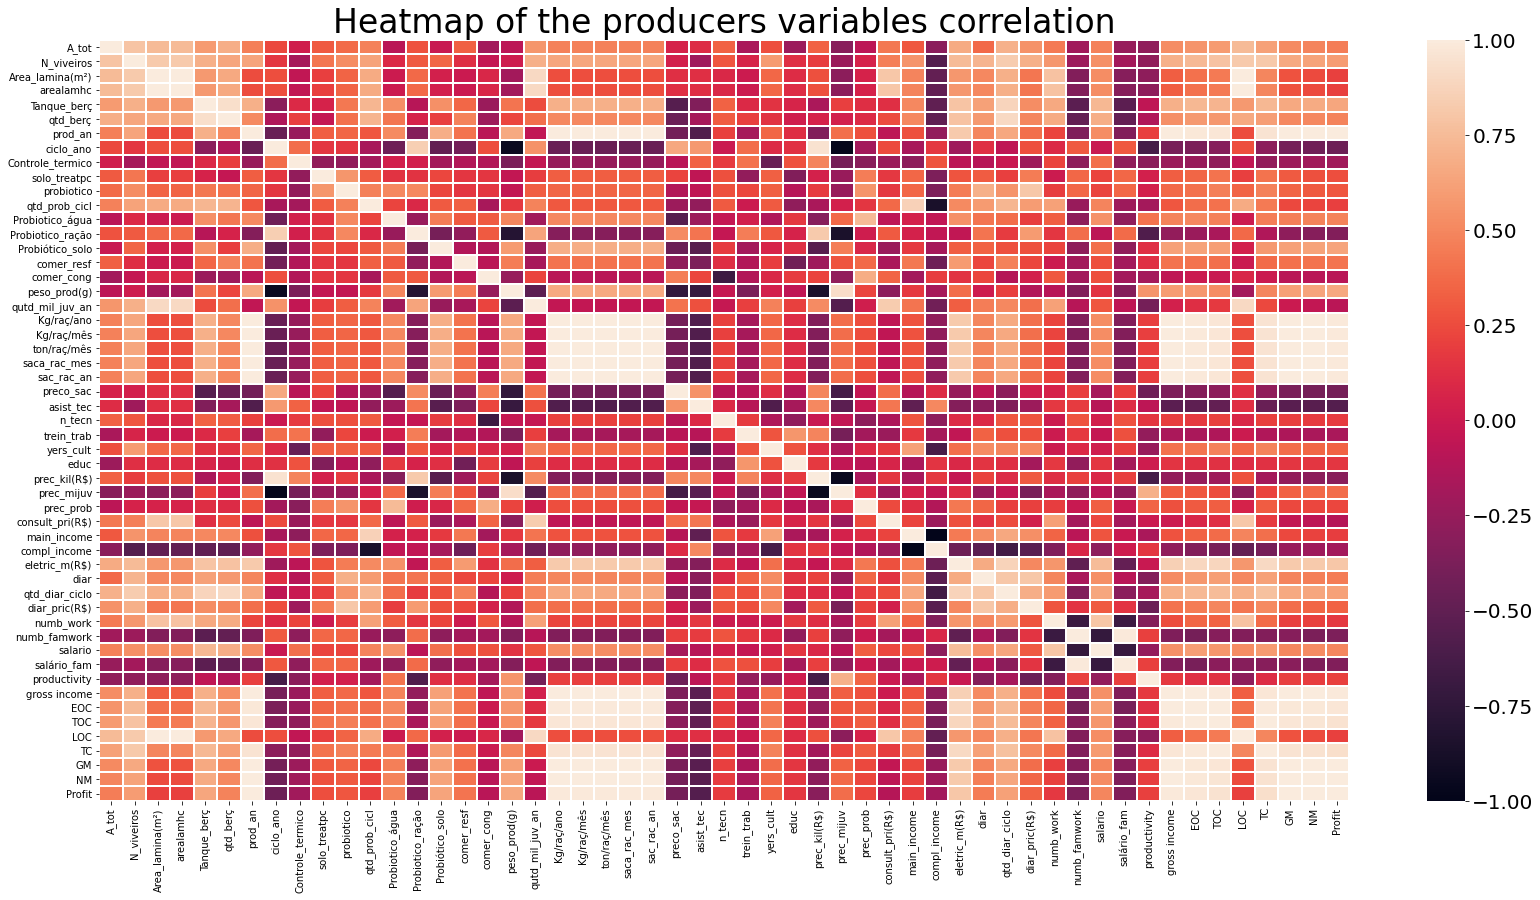

In [14]:
x=plt.figure(figsize=(28,14))
plt.title("Heatmap of the producers variables correlation", fontsize = 33)
plt.rcParams['font.size'] = '20'
plt.rcParams['xtick.labelsize'] = '20'
plt.rcParams['ytick.labelsize'] = '20'
df_corr=df2.corr()
sns.heatmap(df_corr,linewidths=1,linecolor='white')

## Making csv

In [15]:
df.to_csv('feiranovamod.csv', sep = ';', encoding = 'utf-8')

## Initial Modelling

### GLM
#### Gamma
At first, we are going to split our data and create some GLM models to evaluate the annual production of Feira Nova producers 

In [16]:
#Splitting data
x = df[['arealamhc','ciclo_ano','qutd_mil_juv_an','yers_cult','educ','numb_work']]
y = df['prod_an']

#fator de inflação de variância - Variance inflation factor : VIF

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2) 

In [17]:
## GLM Gamma
x2 = sm.add_constant(x)

model = sm.GLM(y, x2, family=sm.families.Gamma())
gamma_results = model.fit()
print(gamma_results.summary())

#Fazer gamma e normal com "AIC" e "STEP" 

                 Generalized Linear Model Regression Results                  
Dep. Variable:                prod_an   No. Observations:                   13
Model:                            GLM   Df Residuals:                        6
Model Family:                   Gamma   Df Model:                            6
Link Function:          inverse_power   Scale:                         0.56810
Method:                          IRLS   Log-Likelihood:                -135.49
Date:                Mon, 19 Dec 2022   Deviance:                       4.4383
Time:                        11:03:06   Pearson chi2:                     3.41
No. Iterations:                     9   Pseudo R-squ. (CS):             0.9652
Covariance Type:            nonrobust                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0005      0.000     

C:\Users\Viniciu\anaconda3\lib\site-packages\statsmodels\genmod\generalized_linear_model.py:298: DomainWarning: The inverse_power link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "


In [18]:
# Creating variables to plot graphs
nobs = gamma_results.nobs
yhat = gamma_results.mu
resid = gamma_results.resid_deviance.copy()
resid_std = stats.zscore(resid)

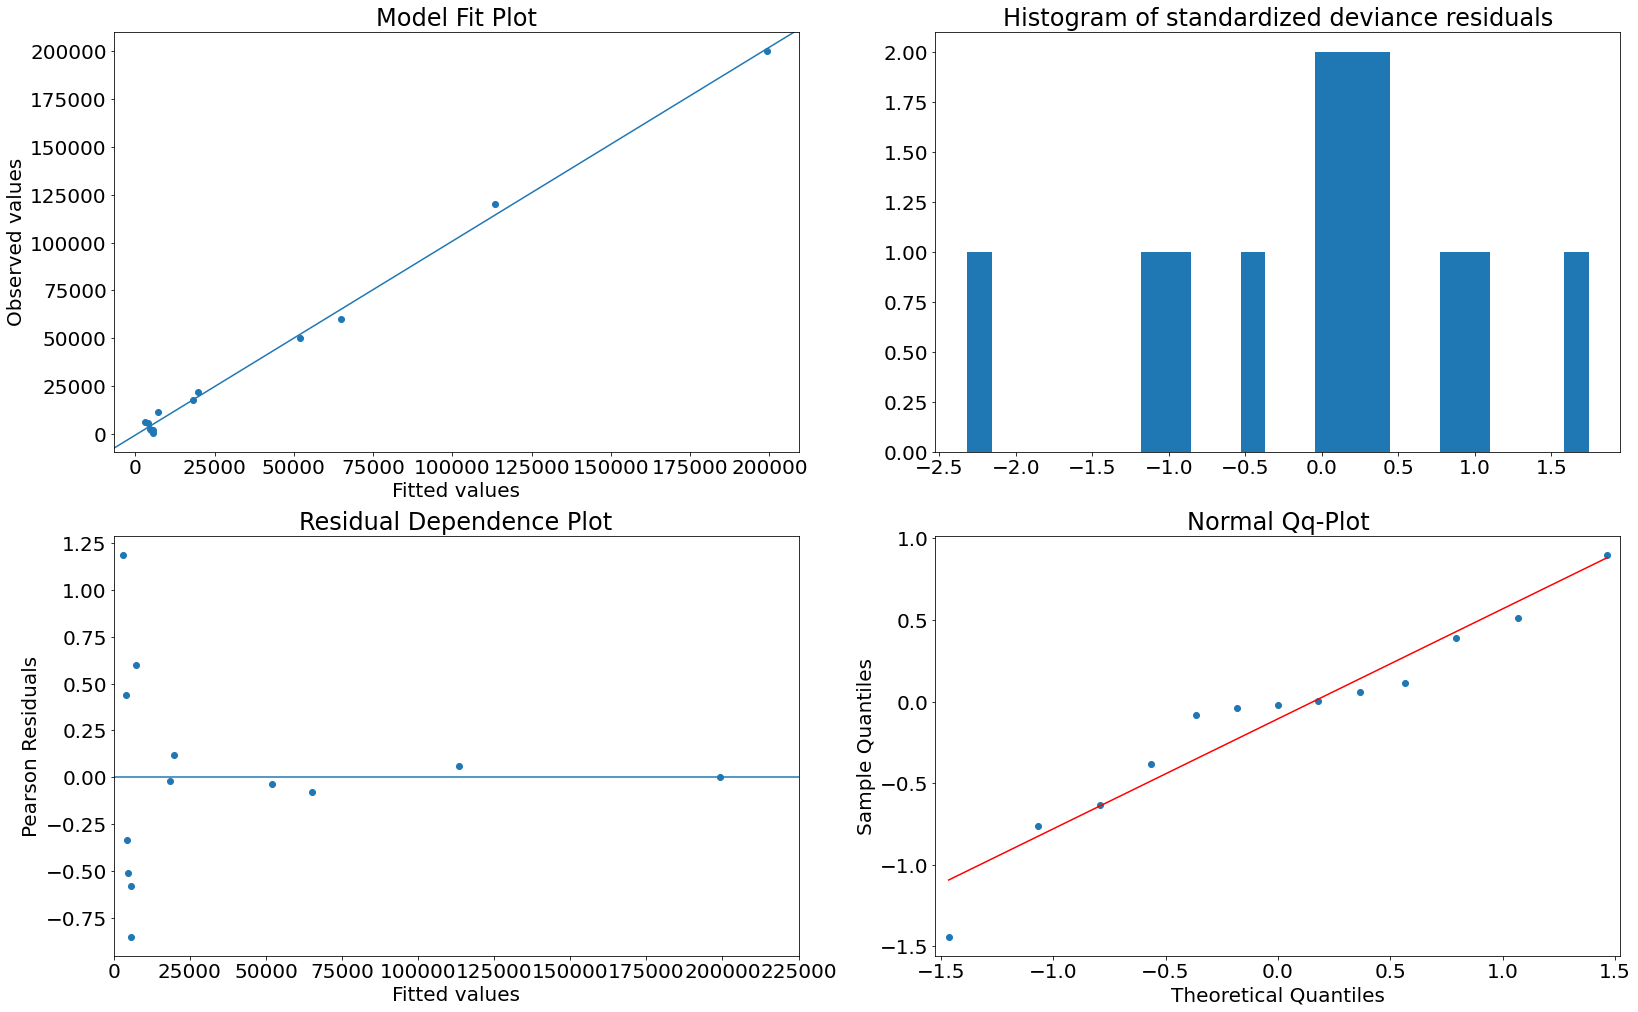

In [19]:
fig, axes = plt.subplots(2, 2, figsize=(27, 17))
axes[0,0].scatter(yhat,y)
line_fit = sm.OLS(y, sm.add_constant(yhat, prepend=True)).fit()
abline_plot(model_results=line_fit, ax=axes[0,0])
axes[0,0].set_title('Model Fit Plot')
axes[0,0].set_ylabel('Observed values')
axes[0,0].set_xlabel('Fitted values');

axes[1,0].scatter(yhat, gamma_results.resid_pearson)
axes[1,0].hlines(0, 0, 225000)
axes[1,0].set_xlim(0, 225000)
axes[1,0].set_title('Residual Dependence Plot')
axes[1,0].set_ylabel('Pearson Residuals')
axes[1,0].set_xlabel('Fitted values');

axes[0,1].hist(resid_std, bins=25)
axes[0,1].set_title('Histogram of standardized deviance residuals');

graphics.gofplots.qqplot(resid, line='r',ax=axes[1,1])
axes[1,1].set_title('Normal Qq-Plot');

#plt.savefig('Model_gamma_1.jpg',dpi=400)

#### Gaussian

In [20]:
# GLM Gaussian
x3 = sm.add_constant(x)


model2 = sm.GLM(y, x3, family=sm.families.Gaussian())
gaus = model2.fit()
print(gaus.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                prod_an   No. Observations:                   13
Model:                            GLM   Df Residuals:                        6
Model Family:                Gaussian   Df Model:                            6
Link Function:               identity   Scale:                      1.1082e+09
Method:                          IRLS   Log-Likelihood:                -148.79
Date:                Mon, 19 Dec 2022   Deviance:                   6.6491e+09
Time:                        11:03:08   Pearson chi2:                 6.65e+09
No. Iterations:                     3   Pseudo R-squ. (CS):             0.9324
Covariance Type:            nonrobust                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -1.223e+05   8.31e+04     

In [21]:
# Creating variables to plot graphs
nobs = gaus.nobs
yhat = gaus.mu
resid = gaus.resid_deviance.copy()
resid_std = stats.zscore(resid)

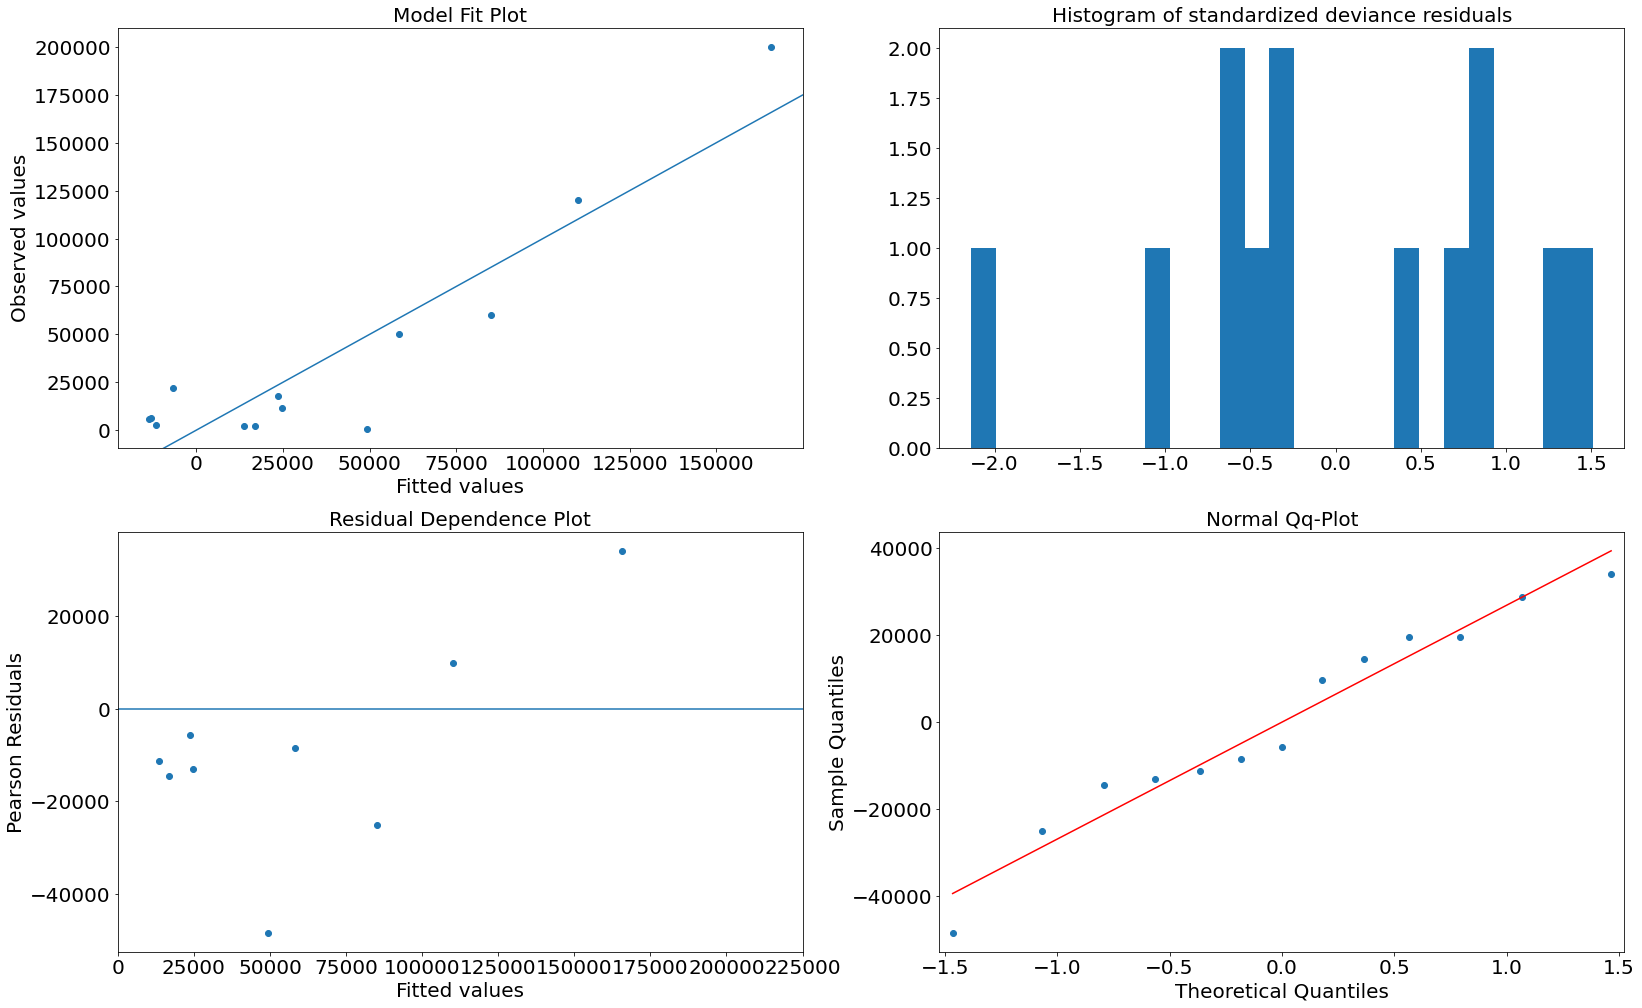

In [22]:
fig, axes = plt.subplots(2, 2, figsize=(27, 17))
axes[0,0].scatter(yhat,y)
line_fit = sm.OLS(y, sm.add_constant(yhat, prepend=True)).fit()
abline_plot(model_results=line_fit, ax=axes[0,0])
axes[0,0].set_title('Model Fit Plot',fontsize=20)
axes[0,0].set_ylabel('Observed values',fontsize=20)
axes[0,0].set_xlabel('Fitted values',fontsize=20);

axes[1,0].scatter(yhat, gaus.resid_pearson)
axes[1,0].hlines(0, 0, 225000)
axes[1,0].set_xlim(0, 225000)
axes[1,0].set_title('Residual Dependence Plot',fontsize=20)
axes[1,0].set_ylabel('Pearson Residuals',fontsize=20)
axes[1,0].set_xlabel('Fitted values',fontsize=20);

axes[0,1].hist(resid_std, bins=25)
axes[0,1].set_title('Histogram of standardized deviance residuals',fontsize=20);

graphics.gofplots.qqplot(resid, line='r',ax=axes[1,1])
axes[1,1].set_title('Normal Qq-Plot',fontsize=20)
axes[1,1].set_ylabel('Sample Quantiles',fontsize=20)
axes[1,1].set_xlabel('Theoretical Quantiles',fontsize=20);

#### Poisson

In [23]:
#Poisson

x4 = sm.add_constant(x)


model3 = sm.GLM(y, x4, family=sm.families.Poisson())
pois = model3.fit()
print(pois.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                prod_an   No. Observations:                   13
Model:                            GLM   Df Residuals:                        6
Model Family:                 Poisson   Df Model:                            6
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -20343.
Date:                Mon, 19 Dec 2022   Deviance:                       40539.
Time:                        11:03:09   Pearson chi2:                 4.92e+04
No. Iterations:                     7   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               3.9098      0.036    1

In [24]:
# Creating variables to plot graphs
nobs = pois.nobs
yhat = pois.mu
resid = pois.resid_deviance.copy()
resid_std = stats.zscore(resid)

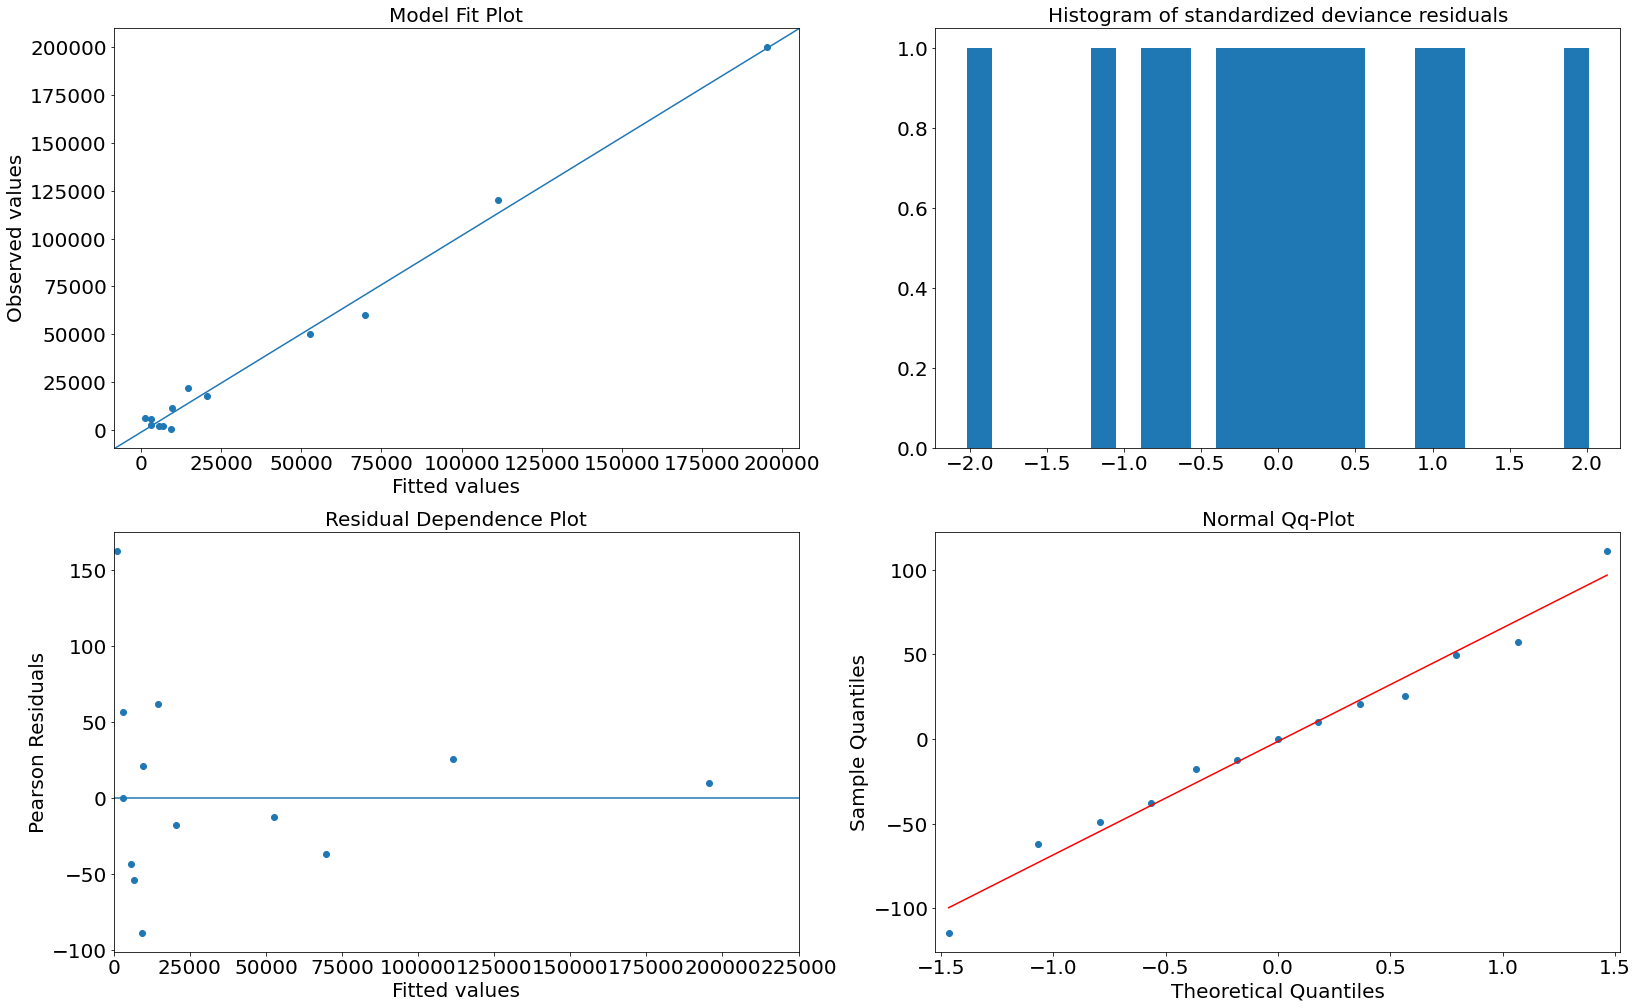

In [25]:
fig, axes = plt.subplots(2, 2, figsize=(27, 17))
axes[0,0].scatter(yhat,y)
line_fit = sm.OLS(y, sm.add_constant(yhat, prepend=True)).fit()
abline_plot(model_results=line_fit, ax=axes[0,0])
axes[0,0].set_title('Model Fit Plot',fontsize=20)
axes[0,0].set_ylabel('Observed values',fontsize=20)
axes[0,0].set_xlabel('Fitted values',fontsize=20);

axes[1,0].scatter(yhat, pois.resid_pearson)
axes[1,0].hlines(0, 0, 225000)
axes[1,0].set_xlim(0, 225000)
axes[1,0].set_title('Residual Dependence Plot',fontsize=20)
axes[1,0].set_ylabel('Pearson Residuals',fontsize=20)
axes[1,0].set_xlabel('Fitted values',fontsize=20);

axes[0,1].hist(resid_std, bins=25)
axes[0,1].set_title('Histogram of standardized deviance residuals',fontsize=20);

graphics.gofplots.qqplot(resid, line='r',ax=axes[1,1])
axes[1,1].set_title('Normal Qq-Plot',fontsize=20)
axes[1,1].set_ylabel('Sample Quantiles',fontsize=20);
axes[1,1].set_xlabel('Theoretical Quantiles',fontsize=20);

## Using GLM in the formula format

## Testar gamma e normal, ver ordem de entradas[sugestão de ver com a deviance], checar AIC, usar método step, checar vif

### Poisson

In [26]:
res = smf.glm(formula ="prod_an ~ arealamhc  + ciclo_ano + qutd_mil_juv_an + yers_cult + educ + numb_work", data = df,
              family=sm.families.Poisson()).fit()

In [27]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                prod_an   No. Observations:                   13
Model:                            GLM   Df Residuals:                        6
Model Family:                 Poisson   Df Model:                            6
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -20343.
Date:                Mon, 19 Dec 2022   Deviance:                       40539.
Time:                        11:03:10   Pearson chi2:                 4.92e+04
No. Iterations:                     7   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           3.9098      0.036    108.232      0.000       3.839       3.981
arealamhc           2.2385      0.007    300.296      0.000       2.224       2.253
ciclo_ano           1.0311      0.012     85.948      0.000       1.008       1.055
qutd_mil_juv_an    -0.0022   7.58e-06   -289.107      0.000      -0.002      -0.002
yers_cult           1.0601      0.003    306.604      0.000       1.053       1.067
educ               -0.0036      0.001     -2.680      0.007      -0.006      -0.001
numb_work           0.9543      0.006    165.390      0.000       0.943       0.966
===================================================================================
"""

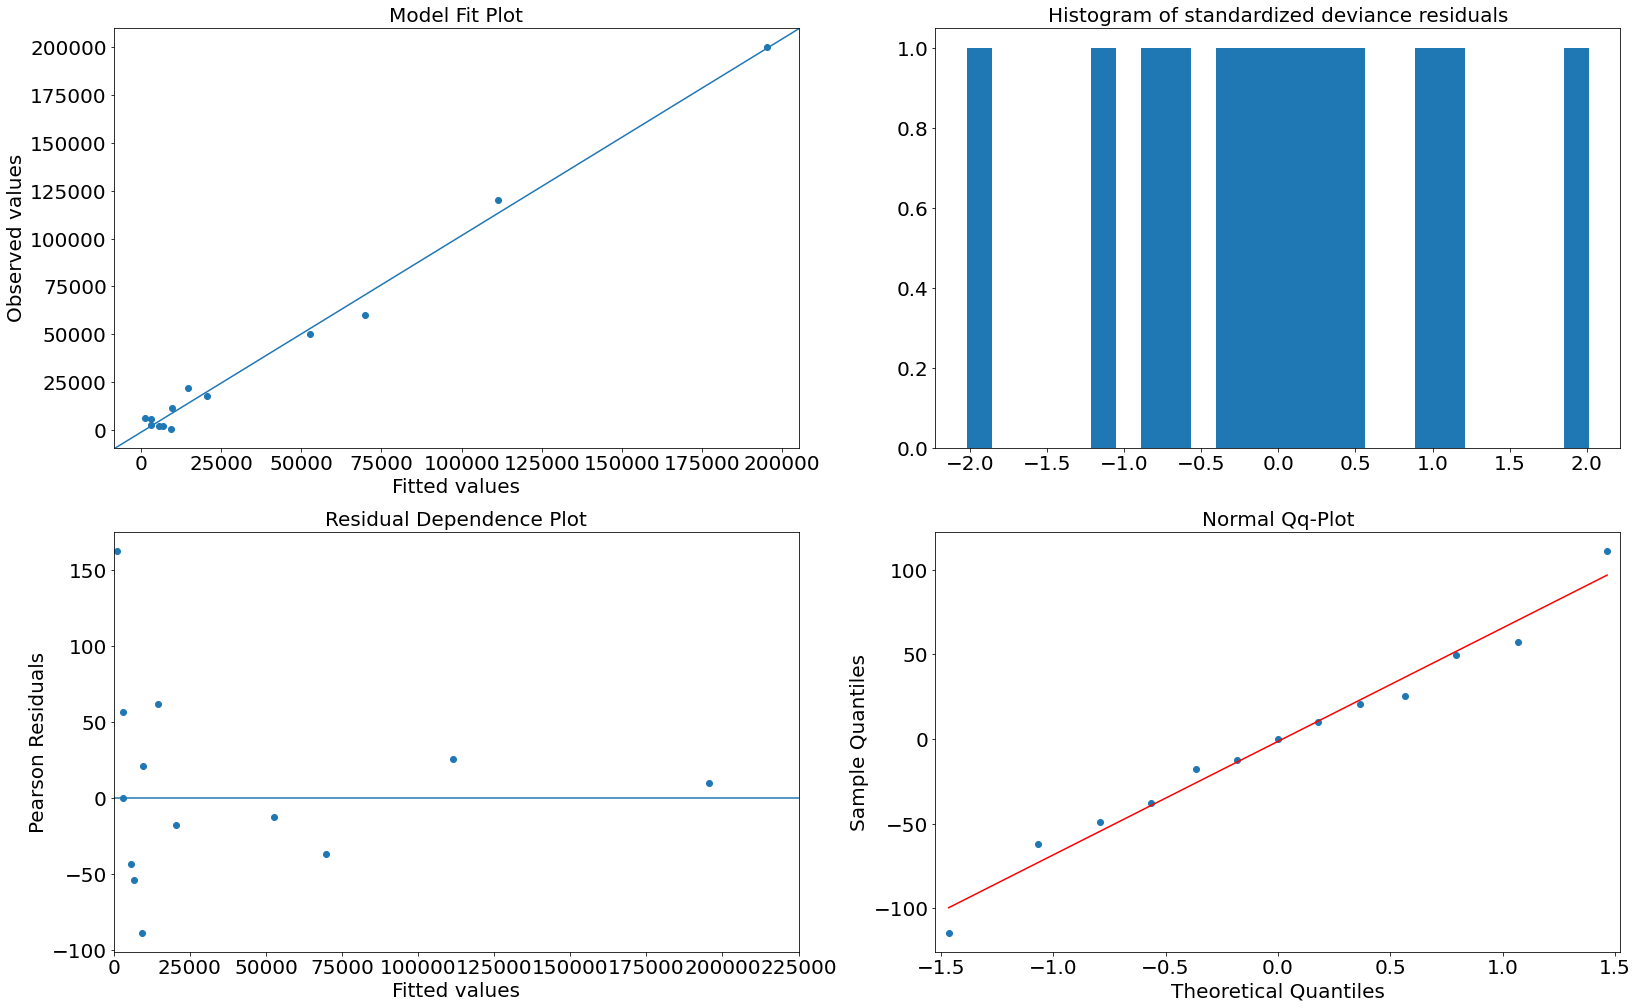

In [28]:
# Creating variables to plot graphs
nobs = res.nobs
yhat = res.mu
resid = res.resid_deviance.copy()
resid_std = stats.zscore(resid)

#plotting painel
fig, axes = plt.subplots(2, 2, figsize=(27, 17))
axes[0,0].scatter(yhat,df['prod_an'])
line_fit = sm.OLS(y, sm.add_constant(yhat, prepend=True)).fit()
abline_plot(model_results=line_fit, ax=axes[0,0])
axes[0,0].set_title('Model Fit Plot',fontsize=20)
axes[0,0].set_ylabel('Observed values',fontsize=20)
axes[0,0].set_xlabel('Fitted values',fontsize=20);

axes[1,0].scatter(yhat, res.resid_pearson)
axes[1,0].hlines(0, 0, 225000)
axes[1,0].set_xlim(0, 225000)
axes[1,0].set_title('Residual Dependence Plot',fontsize=20)
axes[1,0].set_ylabel('Pearson Residuals',fontsize=20)
axes[1,0].set_xlabel('Fitted values',fontsize=20);

axes[0,1].hist(resid_std, bins=25)
axes[0,1].set_title('Histogram of standardized deviance residuals',fontsize=20);

graphics.gofplots.qqplot(resid, line='r',ax=axes[1,1])
axes[1,1].set_title('Normal Qq-Plot',fontsize=20)
axes[1,1].set_ylabel('Sample Quantiles',fontsize=20);
axes[1,1].set_xlabel('Theoretical Quantiles',fontsize=20);

### 2nd Poisson

In [29]:
res1 = smf.glm(formula ="prod_an ~ arealamhc  + ciclo_ano + qutd_mil_juv_an + educ + numb_work + educ:yers_cult + arealamhc:qutd_mil_juv_an", data = df,
              family=sm.families.Poisson()).fit()

res1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                prod_an   No. Observations:                   13
Model:                            GLM   Df Residuals:                        5
Model Family:                 Poisson   Df Model:                            7
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4646.8
Date:                Mon, 19 Dec 2022   Deviance:                       9147.0
Time:                        11:03:11   Pearson chi2:                 8.30e+03
No. Iterations:                     7   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                    10.7084      0.029    367.023      0.000      10.651      10.766
arealamhc                     5.0476      0.013    384.383      0.000       5.022       5.073
ciclo_ano                    -1.0826      0.014    -78.733      0.000      -1.110      -1.056
qutd_mil_juv_an               0.0002   1.05e-05     16.275      0.000       0.000       0.000
educ                         -0.2677      0.004    -66.933      0.000      -0.275      -0.260
numb_work                    -0.6562      0.005   -127.865      0.000      -0.666      -0.646
educ:yers_cult                0.0663      0.001     69.313      0.000       0.064       0.068
arealamhc:qutd_mil_juv_an    -0.0007   2.49e-06   -285.427      0.000      -0.001      -0.001
=============================================================================================
"""

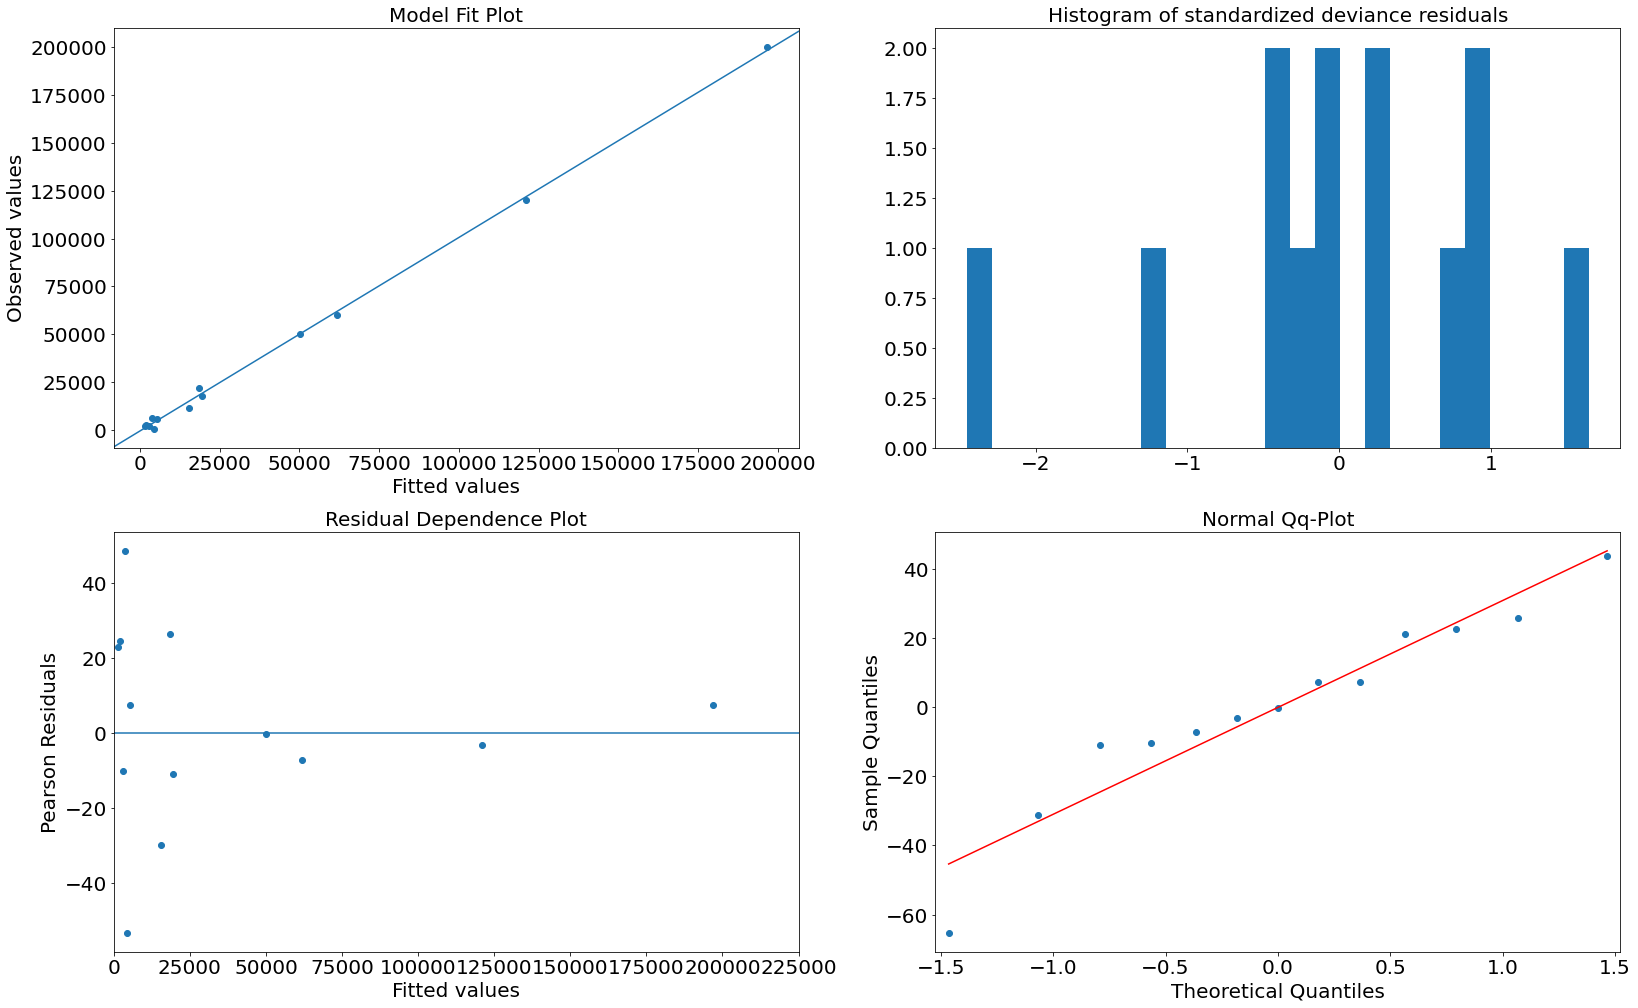

In [30]:
# Creating variables to plot graphs
nobs = res1.nobs
yhat = res1.mu
resid = res1.resid_deviance.copy()
resid_std = stats.zscore(resid)

#plotting painel
fig, axes = plt.subplots(2, 2, figsize=(27, 17))
axes[0,0].scatter(yhat,df['prod_an'])
line_fit = sm.OLS(df['prod_an'], sm.add_constant(yhat, prepend=True)).fit()
abline_plot(model_results=line_fit, ax=axes[0,0])
axes[0,0].set_title('Model Fit Plot',fontsize=20)
axes[0,0].set_ylabel('Observed values',fontsize=20)
axes[0,0].set_xlabel('Fitted values',fontsize=20);

axes[1,0].scatter(yhat, res1.resid_pearson)
axes[1,0].hlines(0, 0, 225000)
axes[1,0].set_xlim(0, 225000)
axes[1,0].set_title('Residual Dependence Plot',fontsize=20)
axes[1,0].set_ylabel('Pearson Residuals',fontsize=20)
axes[1,0].set_xlabel('Fitted values',fontsize=20);

axes[0,1].hist(resid_std, bins=25)
axes[0,1].set_title('Histogram of standardized deviance residuals',fontsize=20);

graphics.gofplots.qqplot(resid, line='r',ax=axes[1,1])
axes[1,1].set_title('Normal Qq-Plot',fontsize=20)
axes[1,1].set_ylabel('Sample Quantiles',fontsize=20);
axes[1,1].set_xlabel('Theoretical Quantiles',fontsize=20);

#plt.savefig('Model_poisson_2.jpg',dpi=400)

### Gamma 

In [31]:
res1 = smf.glm(formula ="prod_an ~ arealamhc  +ciclo_ano + qutd_mil_juv_an + yers_cult + educ + numb_work", data = df,
              family=sm.families.Gamma()).fit()

C:\Users\Viniciu\anaconda3\lib\site-packages\statsmodels\genmod\generalized_linear_model.py:298: DomainWarning: The inverse_power link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "


In [32]:
res1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                prod_an   No. Observations:                   13
Model:                            GLM   Df Residuals:                        6
Model Family:                   Gamma   Df Model:                            6
Link Function:          inverse_power   Scale:                         0.56810
Method:                          IRLS   Log-Likelihood:                -135.49
Date:                Mon, 19 Dec 2022   Deviance:                       4.4383
Time:                        11:03:13   Pearson chi2:                     3.41
No. Iterations:                     9   Pseudo R-squ. (CS):             0.9652
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.0005      0.000      1.582      0.114      -0.000       0.001
arealamhc       -5.591e-05   5.33e-05     -1.049      0.294      -0.000    4.86e-05
ciclo_ano       -6.297e-05      0.000     -0.581      0.561      -0.000       0.000
qutd_mil_juv_an  9.655e-08   6.73e-08      1.435      0.151   -3.53e-08    2.28e-07
yers_cult       -7.831e-05   3.14e-05     -2.497      0.013      -0.000   -1.68e-05
educ             4.588e-06   9.52e-06      0.482      0.630   -1.41e-05    2.32e-05
numb_work          -0.0001    4.9e-05     -2.221      0.026      -0.000   -1.28e-05
===================================================================================
"""

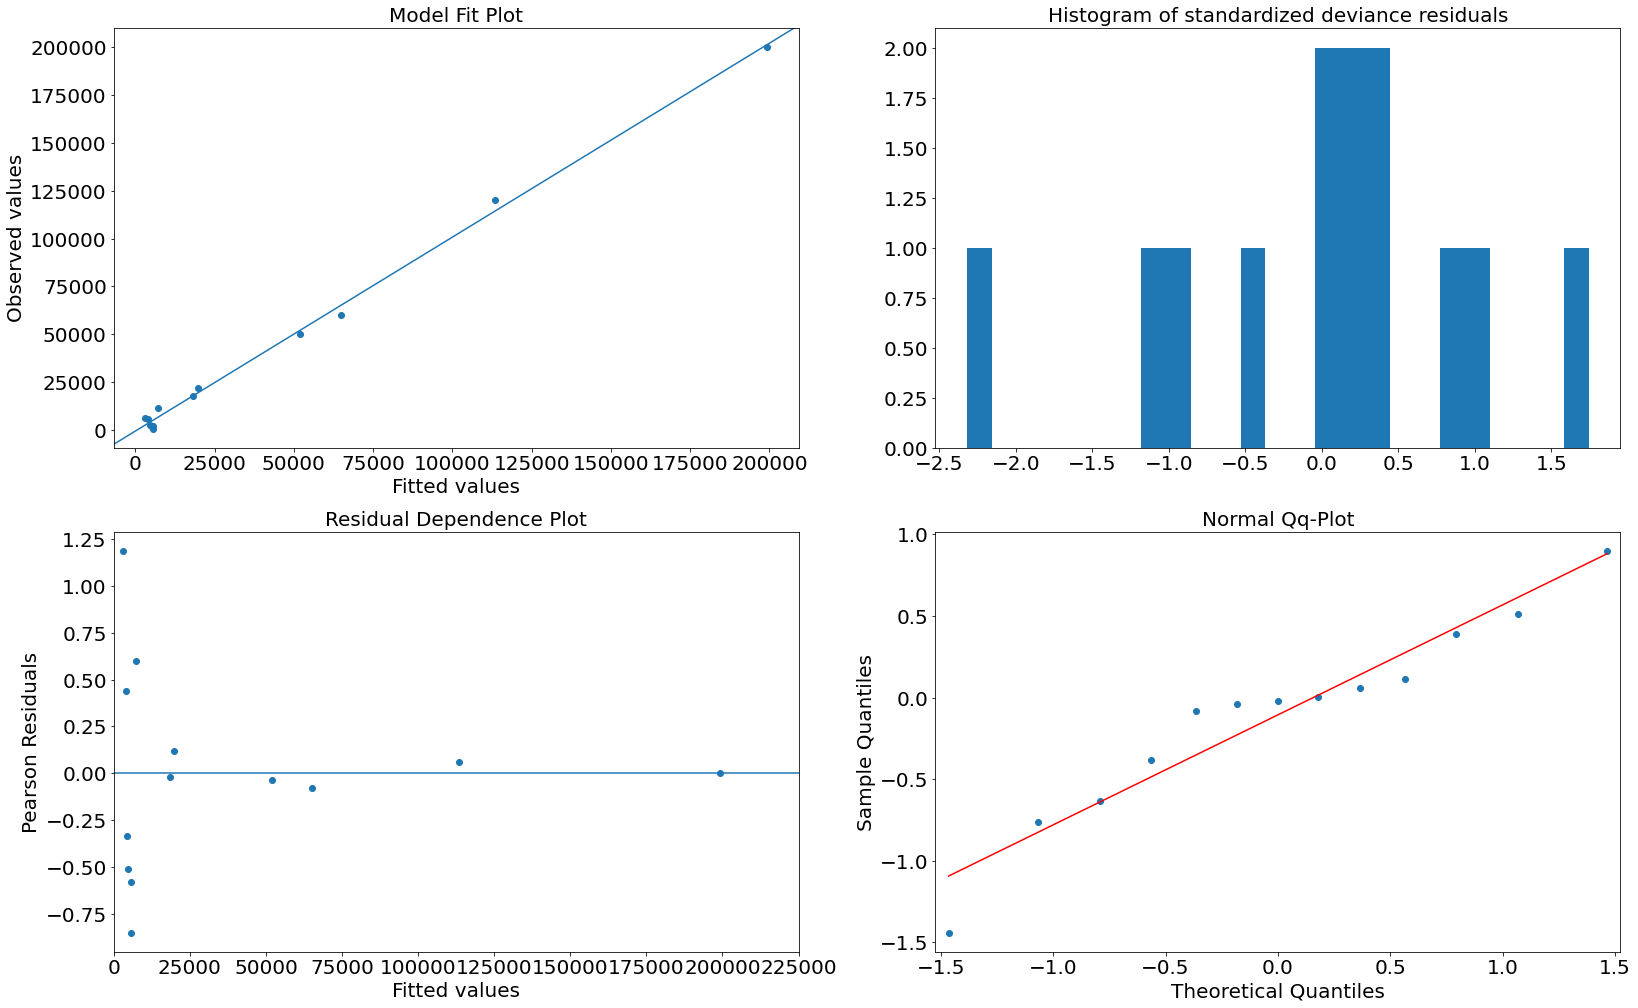

In [33]:
# Creating variables to plot graphs
nobs = res1.nobs
yhat = res1.mu
resid = res1.resid_deviance.copy()
resid_std = stats.zscore(resid)

#plotting painel
fig, axes = plt.subplots(2, 2, figsize=(27, 17))
axes[0,0].scatter(yhat,df['prod_an'])
line_fit = sm.OLS(df['prod_an'], sm.add_constant(yhat, prepend=True)).fit()
abline_plot(model_results=line_fit, ax=axes[0,0])
axes[0,0].set_title('Model Fit Plot',fontsize=20)
axes[0,0].set_ylabel('Observed values',fontsize=20)
axes[0,0].set_xlabel('Fitted values',fontsize=20);

axes[1,0].scatter(yhat, res1.resid_pearson)
axes[1,0].hlines(0, 0, 225000)
axes[1,0].set_xlim(0, 225000)
axes[1,0].set_title('Residual Dependence Plot',fontsize=20)
axes[1,0].set_ylabel('Pearson Residuals',fontsize=20)
axes[1,0].set_xlabel('Fitted values',fontsize=20);

axes[0,1].hist(resid_std, bins=25)
axes[0,1].set_title('Histogram of standardized deviance residuals',fontsize=20);

graphics.gofplots.qqplot(resid, line='r',ax=axes[1,1])
axes[1,1].set_title('Normal Qq-Plot',fontsize=20)
axes[1,1].set_ylabel('Sample Quantiles',fontsize=20);
axes[1,1].set_xlabel('Theoretical Quantiles',fontsize=20);

### 2nd Gamma

In [34]:
res3 = smf.glm(formula ="prod_an ~ arealamhc  + ciclo_ano + qutd_mil_juv_an + educ + numb_work + educ:yers_cult + arealamhc:qutd_mil_juv_an", data = df,
              family=sm.families.Gamma()).fit()

res3.summary()

#cuidado com entralpia

C:\Users\Viniciu\anaconda3\lib\site-packages\statsmodels\genmod\generalized_linear_model.py:298: DomainWarning: The inverse_power link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                prod_an   No. Observations:                   13
Model:                            GLM   Df Residuals:                        5
Model Family:                   Gamma   Df Model:                            7
Link Function:          inverse_power   Scale:                         0.34379
Method:                          IRLS   Log-Likelihood:                -131.63
Date:                Mon, 19 Dec 2022   Deviance:                       2.4412
Time:                        11:03:14   Pearson chi2:                     1.72
No. Iterations:                     9   Pseudo R-squ. (CS):             0.9975
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                  3.609e-06      0.000      0.014      0.989      -0.000       0.000
arealamhc                    -0.0003   9.25e-05     -2.817      0.005      -0.000   -7.93e-05
ciclo_ano                     0.0001      0.000      0.943      0.345      -0.000       0.000
qutd_mil_juv_an           -8.499e-08   7.79e-08     -1.091      0.275   -2.38e-07    6.76e-08
educ                       2.443e-05   3.31e-05      0.739      0.460   -4.04e-05    8.92e-05
numb_work                 -2.373e-07   1.93e-05     -0.012      0.990   -3.81e-05    3.76e-05
educ:yers_cult            -5.795e-06   6.85e-06     -0.846      0.397   -1.92e-05    7.62e-06
arealamhc:qutd_mil_juv_an  5.348e-08   1.44e-08      3.724      0.000    2.53e-08    8.16e-08
=============================================================================================
"""

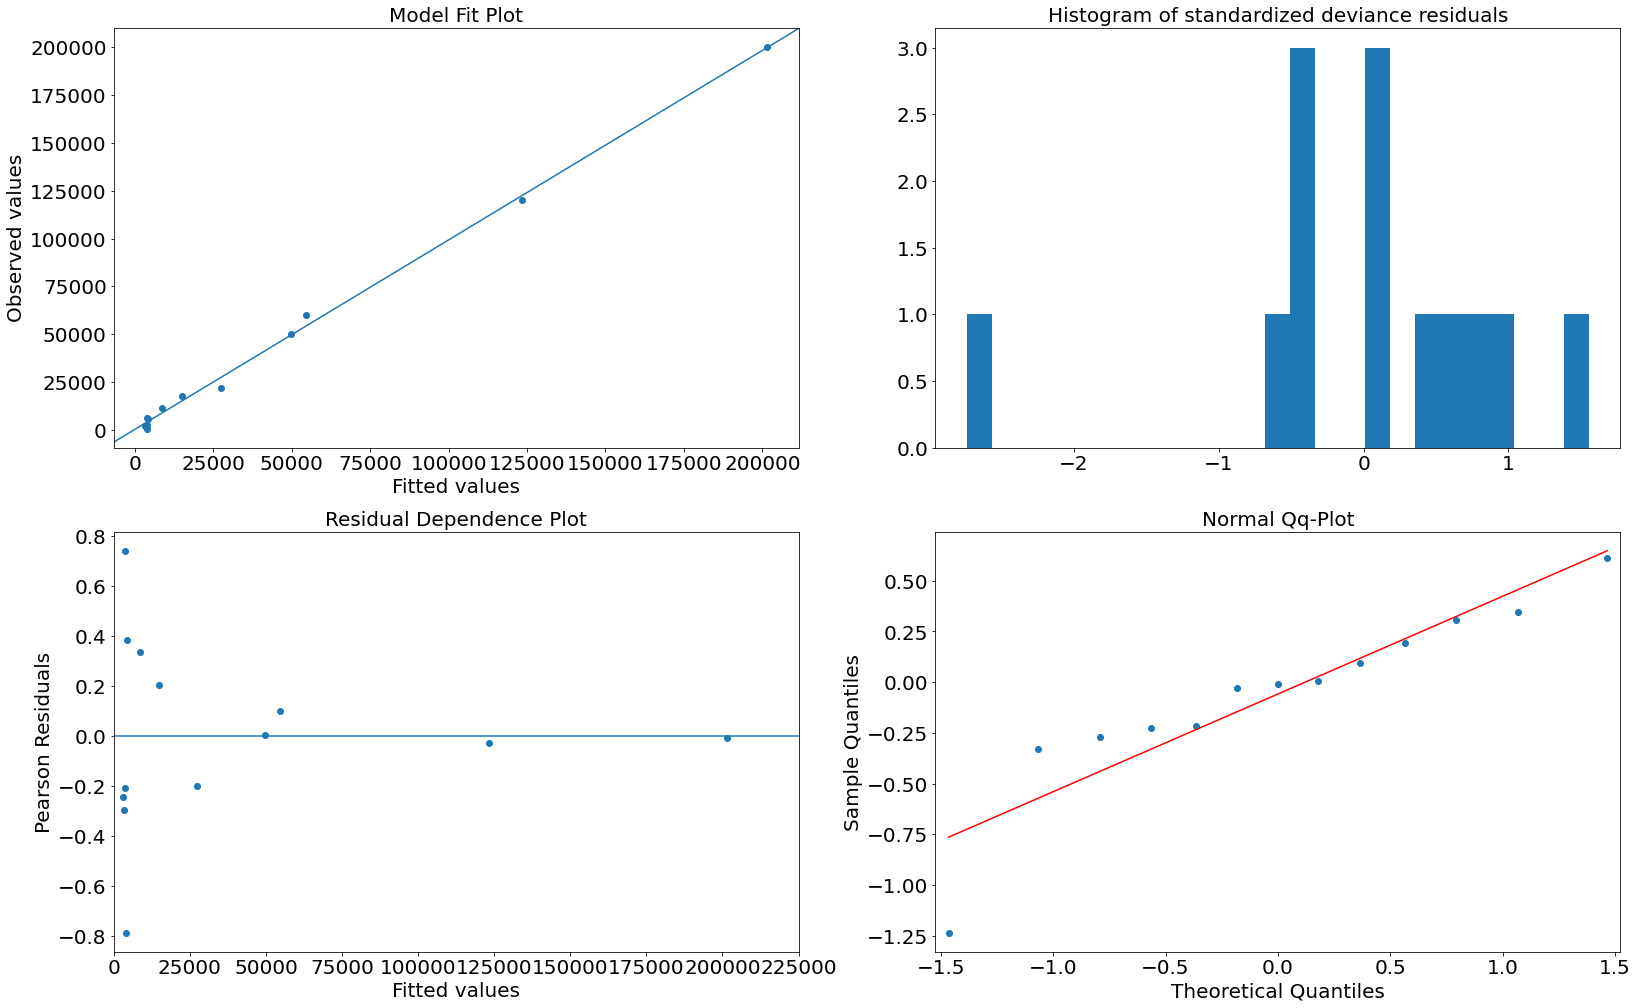

In [35]:
# Creating variables to plot graphs
nobs = res3.nobs
yhat = res3.mu
resid = res3.resid_deviance.copy()
resid_std = stats.zscore(resid)

#plotting painel
fig, axes = plt.subplots(2, 2, figsize=(27, 17))
axes[0,0].scatter(yhat,df['prod_an'])
line_fit = sm.OLS(df['prod_an'], sm.add_constant(yhat, prepend=True)).fit()
abline_plot(model_results=line_fit, ax=axes[0,0])
axes[0,0].set_title('Model Fit Plot',fontsize=20)
axes[0,0].set_ylabel('Observed values',fontsize=20)
axes[0,0].set_xlabel('Fitted values',fontsize=20);

axes[1,0].scatter(yhat, res3.resid_pearson)
axes[1,0].hlines(0, 0, 225000)
axes[1,0].set_xlim(0, 225000)
axes[1,0].set_title('Residual Dependence Plot',fontsize=20)
axes[1,0].set_ylabel('Pearson Residuals',fontsize=20)
axes[1,0].set_xlabel('Fitted values',fontsize=20);

axes[0,1].hist(resid_std, bins=25)
axes[0,1].set_title('Histogram of standardized deviance residuals',fontsize=20);

graphics.gofplots.qqplot(resid, line='r',ax=axes[1,1])
axes[1,1].set_title('Normal Qq-Plot',fontsize=20)
axes[1,1].set_ylabel('Sample Quantiles',fontsize=20);
axes[1,1].set_xlabel('Theoretical Quantiles',fontsize=20);

## Creating an economic dataframe for analysis

In [36]:
# Subseting these new economic variables
economic_df = df[['productivity','esp_cult','gross income','EOC','TOC','LOC','TC','GM','NM','Profit']]

In [37]:
economic_df.head(13)

,productivity,esp_cult,gross income,EOC,TOC,LOC,TC,GM,NM,Profit
0,11700.000000,Camarão,222300.0,111420.0,127980.00,20000.0,147980.00,110880.0,94320.00,74320.00
1,22002.000000,Camarão,374034.0,219540.0,255300.00,20000.0,275300.00,154494.0,118734.00,98734.00
2,523809.523810,Tilápia,79200.0,35752.0,105702.00,252.0,105954.00,43448.0,-26502.00,-26754.00
3,94444.444444,Tilápia,11050.0,5640.0,6640.00,180.0,6820.00,5410.0,4410.00,4230.00
4,83335.416667,Tilápia,600015.0,305038.0,321788.00,14400.0,336188.00,294977.0,278227.00,263827.00
5,222222.222222,Tilápia,2600000.0,949960.0,997570.00,18000.0,1015570.00,1650040.0,1602430.00,1584430.00
6,191082.802548,Tilápia,36000.0,27600.0,33840.00,314.0,34154.00,8400.0,2160.00,1846.00
7,13333.333333,Camarão,40800.0,37914.0,40584.00,3600.0,44184.00,2886.0,216.00,-3384.00
8,26666.666667,Camarão,102000.0,48450.0,115950.00,4500.0,120450.00,53550.0,-13950.00,-18450.00
9,24489.795918,Camarão,40800.0,24120.0,75320.00,1960.0,77280.00,16680.0,-34520.00,-36480.00


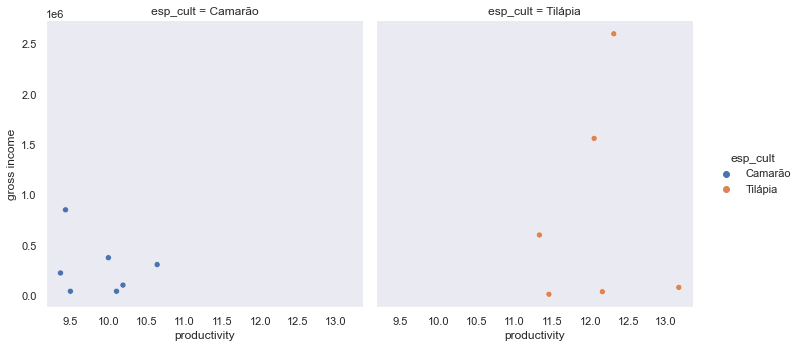

In [38]:
sns.set_theme(style="dark")
g=sns.relplot(data=economic_df, x=np.log(economic_df["productivity"]), y="gross income",
              col='esp_cult', hue="esp_cult")
g.tight_layout()

Text(0.5, 1.0, 'Cultured species profit')

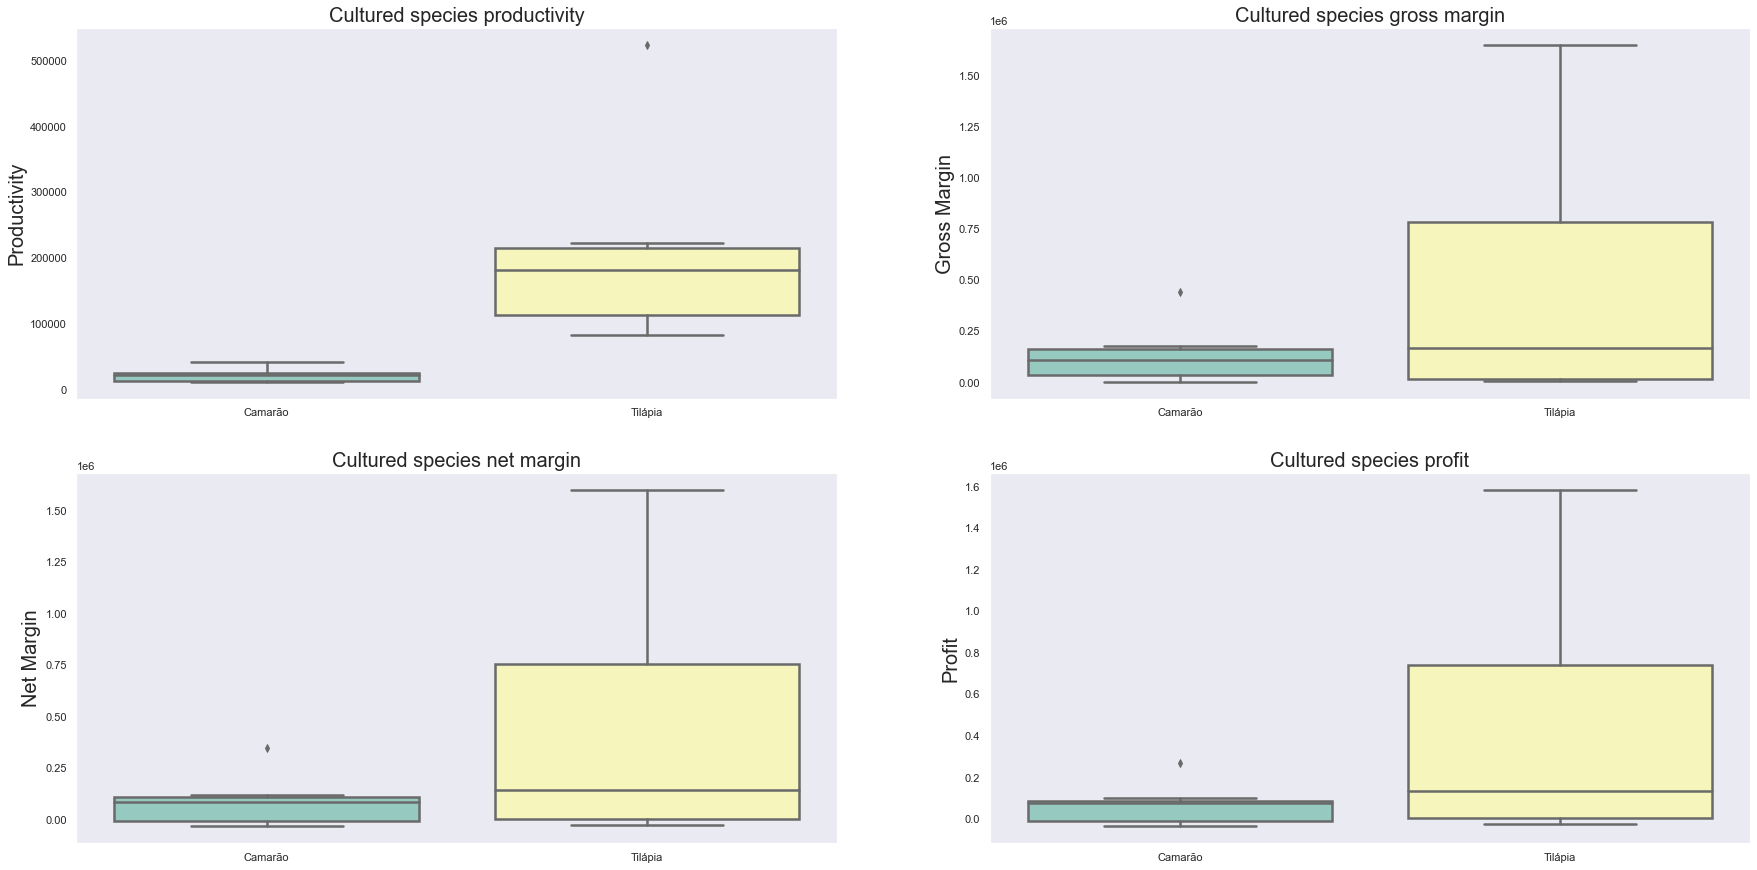

In [39]:
fig, axes = plt.subplots(2, 2, figsize=(30, 15))
plt.rcParams['xtick.labelsize'] = '20'
plt.rcParams['ytick.labelsize'] = '20'

sns.boxplot(x="esp_cult", y="productivity", data=economic_df, linewidth=2.5,palette="Set3", ax=axes[0,0])
axes[0, 0].set_ylabel('Productivity',fontsize=20)
axes[0, 0].set_xlabel('',fontsize=20)
axes[0,0].set_title("Cultured species productivity",fontsize=20)

sns.boxplot(x="esp_cult", y="GM", data=economic_df, linewidth=2.5,palette="Set3", ax=axes[0,1])
axes[0, 1].set_ylabel('Gross Margin',fontsize=20)
axes[0, 1].set_xlabel('',fontsize=20)
axes[0, 1].set_title("Cultured species gross margin",fontsize=20)

sns.boxplot(x="esp_cult", y="NM", data=economic_df, linewidth=2.5,palette="Set3", ax=axes[1,0])
axes[1, 0].set_ylabel('Net Margin',fontsize=20)
axes[1, 0].set_xlabel('',fontsize=20)
axes[1, 0].set_title("Cultured species net margin",fontsize=20)


sns.boxplot(x="esp_cult", y="Profit", data=economic_df, linewidth=2.5,palette="Set3", ax=axes[1,1])
axes[1, 1].set_ylabel('Profit',fontsize=20)
axes[1, 1].set_xlabel('',fontsize=20)
axes[1, 1].set_title("Cultured species profit",fontsize=20)

#plt.savefig('economic_bp.jpg',dpi=400)